In [1]:
import os 
os.chdir("/Users/anushachebolu/Documents/AML/Homework1/Question 2")
os.getcwd()

'/Users/anushachebolu/Documents/AML/Homework1/Question 2'

# A. Summarizing the Data

In [2]:
import pandas as pd

# Load the dataset
data = pd.read_csv('insurance.csv')

# Determine the number of records and attributes
num_records, num_attributes = data.shape

# Identify the data type of each attribute
data_types = data.dtypes

num_records, num_attributes, data_types

(1338,
 7,
 age           int64
 sex          object
 bmi         float64
 children      int64
 smoker       object
 region       object
 expenses    float64
 dtype: object)

### Based on the dataset:

* There are 1,338 records and 7 attributes.
* Attributes and their types:
     * age (int64): Continuous valued.
     * sex (object): Categorical.
     * bmi (float64): Continuous valued.
     * children (int64): Continuous valued (although it represents discrete counts).
     * smoker (object): Categorical.
     * region (object): Categorical.
     * expenses (float64): Continuous valued (this is likely our target variable).

In [118]:
#Checking number of null values in each column
data.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

In [119]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int64  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int64  
 5   region    1338 non-null   int64  
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(5)
memory usage: 73.3 KB


# B. Statistical Values and Visualizations

In [6]:
#converting categorical data to continous data
data['sex']=data['sex'].map({'female':0, 'male':1})
data['smoker']=data['smoker'].map({'no':0, 'yes':1})
data['region']=data['region'].map({'northwest':0, 'northeast':1,'southeast':2,'southwest':3})
data.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,0,27.9,0,1,3,16884.92
1,18,1,33.8,1,0,2,1725.55
2,28,1,33.0,3,0,2,4449.46
3,33,1,22.7,0,0,0,21984.47
4,32,1,28.9,0,0,0,3866.86


,age,sex,bmi,children,smoker,region,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.665471,1.094918,0.204783,1.514948,13270.422414
std,14.049960,0.500160,6.098382,1.205493,0.403694,1.105572,12110.011240
min,18.000000,0.000000,16.000000,0.000000,0.000000,0.000000,1121.870000
25%,27.000000,0.000000,26.300000,0.000000,0.000000,1.000000,4740.287500
50%,39.000000,1.000000,30.400000,1.000000,0.000000,2.000000,9382.030000
75%,51.000000,1.000000,34.700000,2.000000,0.000000,2.000000,16639.915000
max,64.000000,1.000000,53.100000,5.000000,1.000000,3.000000,63770.430000


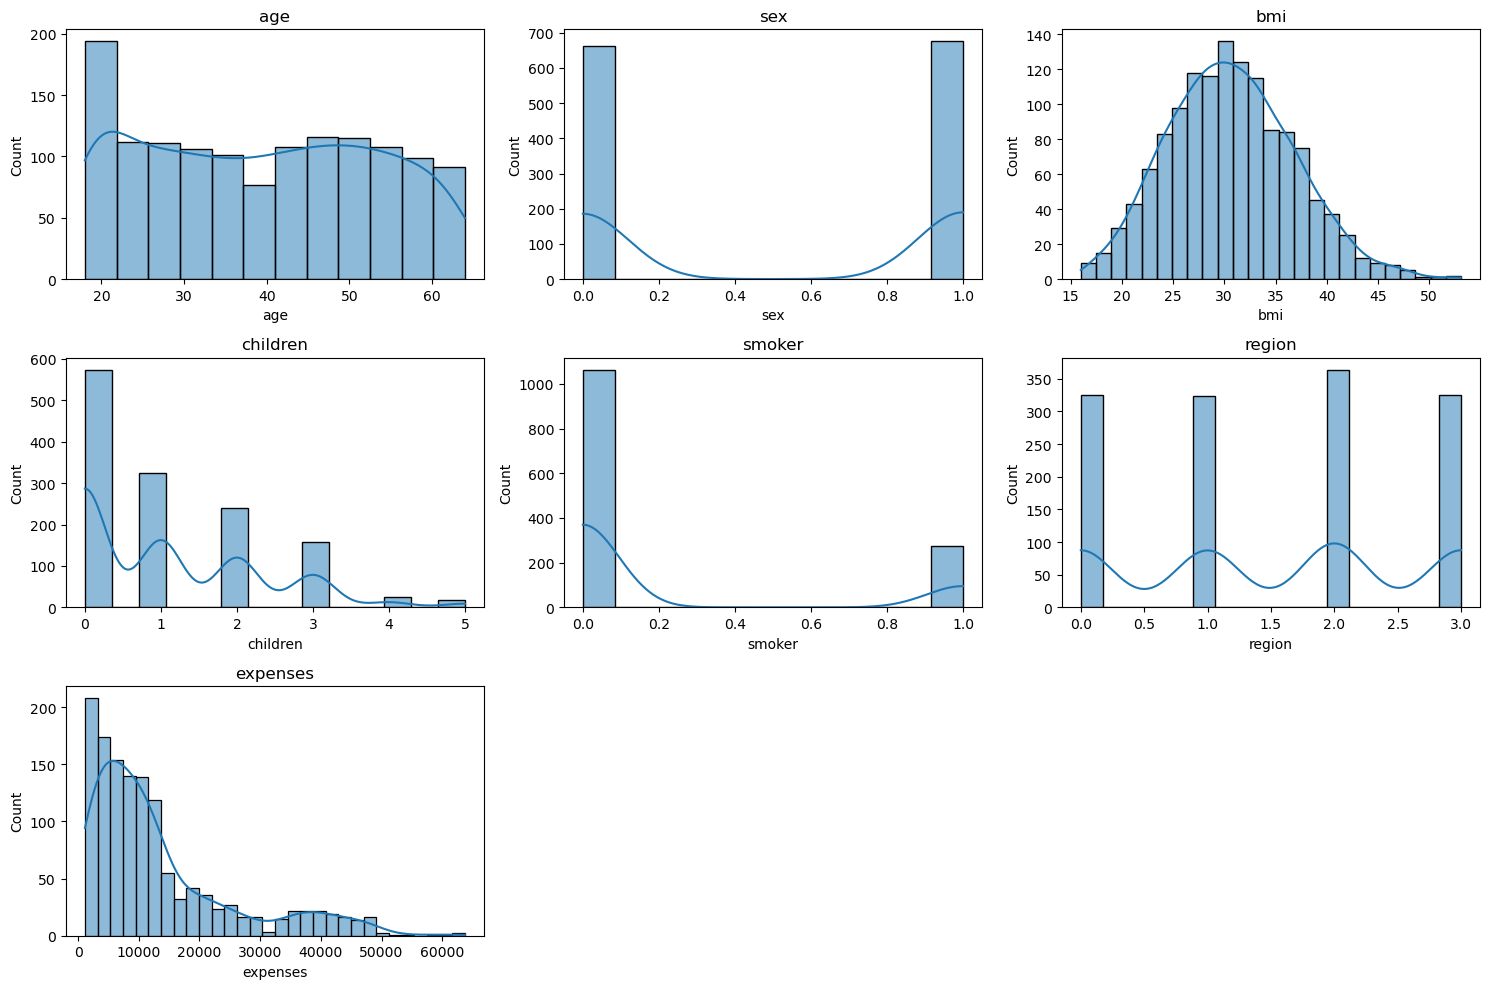

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Compute statistical values
statistics = data.describe(include='all')

# Visualize distributions for each attribute
plt.figure(figsize=(15, 10))

for idx, column in enumerate(data.columns, 1):
    plt.subplot(3, 3, idx)
    if data[column].dtype == 'object':  # Categorical data
        sns.countplot(data[column])
    else:  # Continuous data
        sns.histplot(data[column], kde=True)
    plt.title(column)
    plt.tight_layout()

statistics

### Here are the statistical summaries and observations for each attribute:

* age: The age ranges from 18 to 64, with a mean age of approximately 39. The distribution appears fairly uniform, indicating that the dataset has a diverse age group.
* sex: There are two categories: male and female. The dataset has a nearly equal distribution of both genders, with males being slightly more prevalent.
* bmi: The BMI ranges from 16 to 53.1, with an average of approximately 30.7. The distribution looks roughly normal, but there seems to be a slight right-skew.
* children: Most people in the dataset have 0 to 2 children, with fewer having 3 to 5 children.
* smoker: The vast majority of individuals are non-smokers, with only a small proportion being smokers.
* region: The southeast region has the highest count, but the other regions are also well-represented.
* expenses: The medical expenses vary widely, ranging from USD 1,121.87 to USD 63,770.43 with a mean of approximately USD 13,270.42. 
* The distribution is right-skewed, indicating that most individuals have relatively low medical expenses, but there are a few with very high expenses.

### Key Observations:
* bmi: While the distribution appears normal, it might be worth checking for outliers, especially on the higher end.
* smoker: Being a critical factor in determining health insurance premiums, the imbalance between smokers and non-smokers might influence model performance.
* expenses: The right-skewed distribution of expenses might require transformations (like logarithmic transformation) to make it more normally distributed, especially if linear models are used.

### Potential Special Treatments:
* bmi: Outlier treatment or transformation.
* smoker: Potential oversampling or using techniques to handle class imbalance if it becomes a predictive challenge.
* expenses: Data transformation to address skewness, especially if working with linear models.

In [121]:
train_cols = data.columns.tolist() 
train_cols.remove('expenses') 
print(train_cols)

['age', 'sex', 'bmi', 'children', 'smoker', 'region']


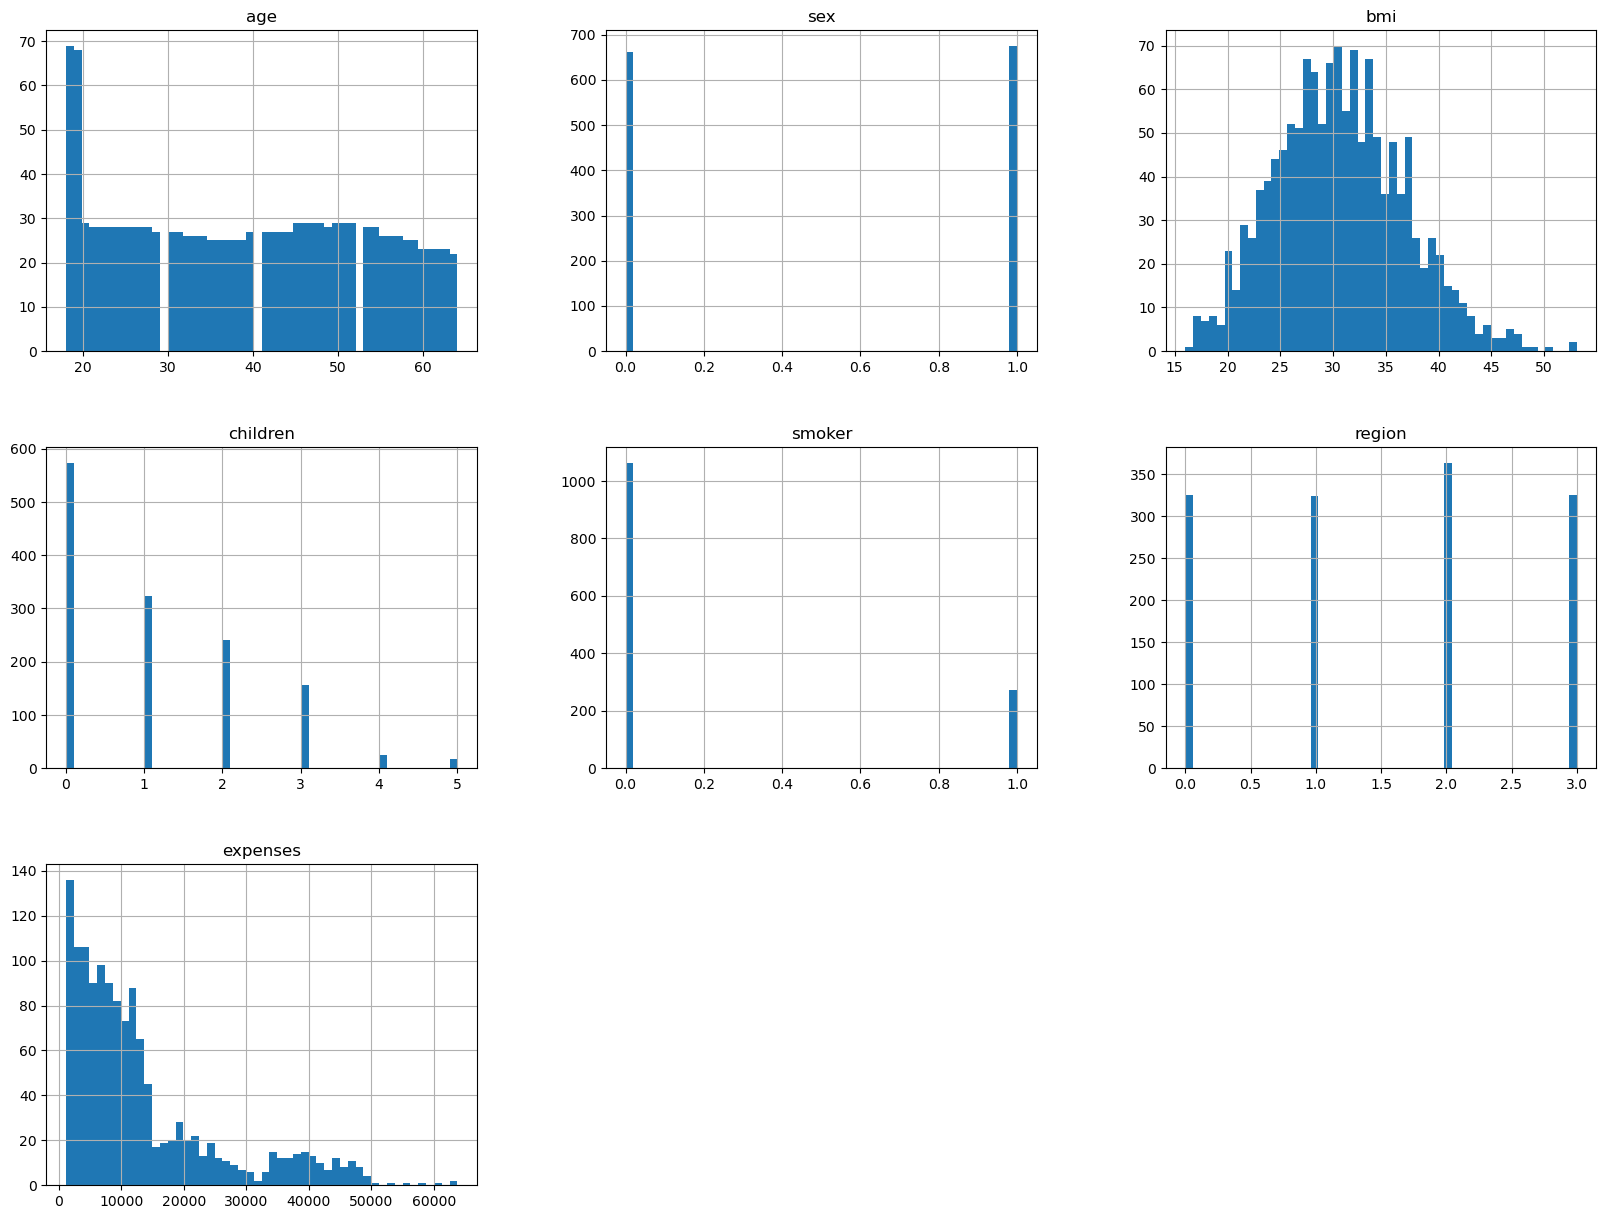

In [122]:
data[train_cols+['expenses']].hist(bins=50,figsize=(20,15)) 
plt.show()

# C. Analyzing Relationships between Data Attributes

In [8]:
data.corr()

,age,sex,bmi,children,smoker,region,expenses
age,1.000000,-0.020856,0.109341,0.042469,-0.025019,0.003243,0.299008
sex,-0.020856,1.000000,0.046380,0.017163,0.076185,0.007974,0.057292
bmi,0.109341,0.046380,1.000000,0.012645,0.003968,0.156583,0.198576
children,0.042469,0.017163,0.012645,1.000000,0.007673,-0.001907,0.067998
smoker,-0.025019,0.076185,0.003968,0.007673,1.000000,0.013246,0.787251
region,0.003243,0.007974,0.156583,-0.001907,0.013246,1.000000,0.011741
expenses,0.299008,0.057292,0.198576,0.067998,0.787251,0.011741,1.000000


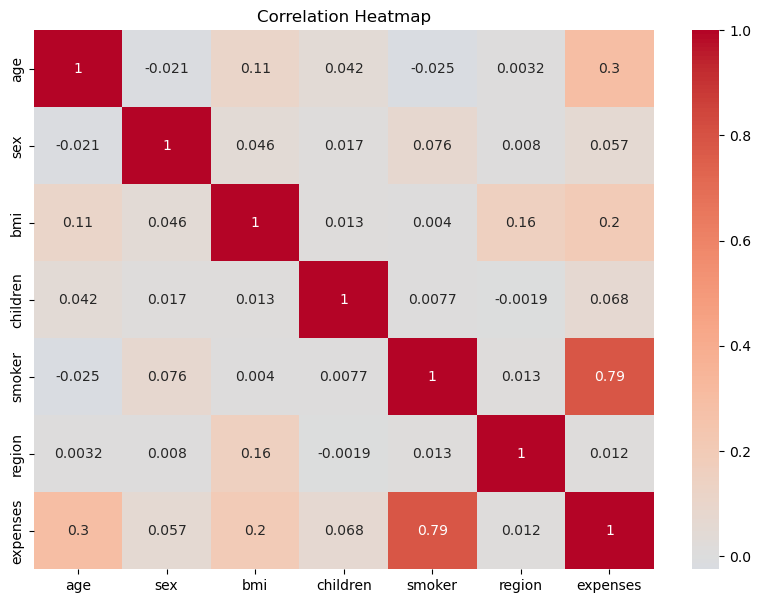

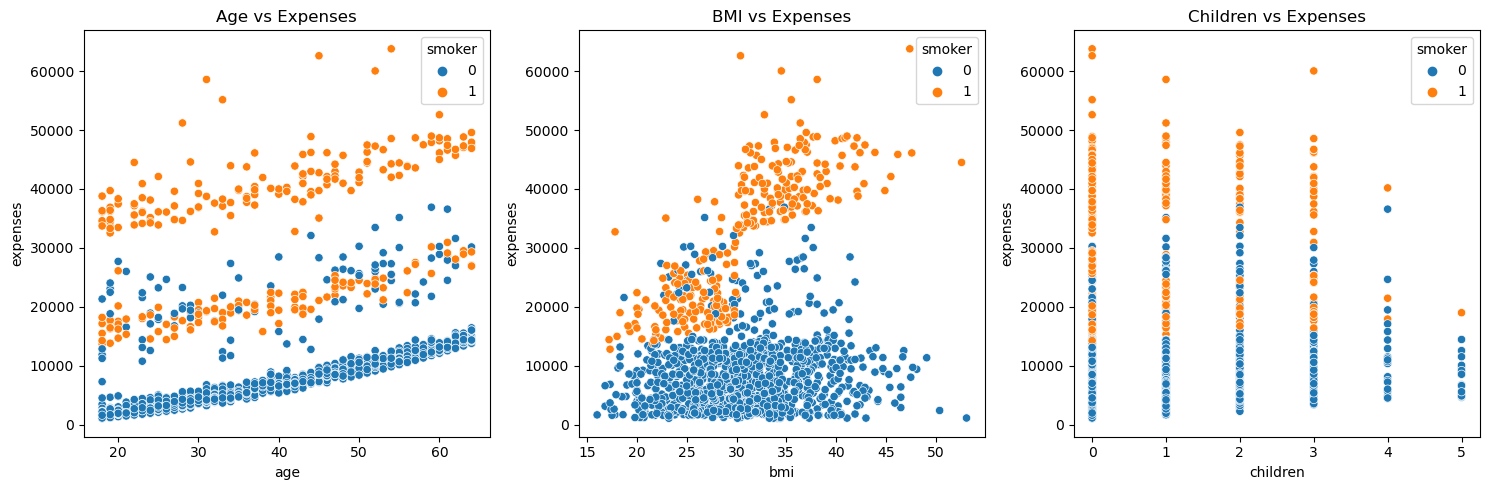

In [9]:
# Compute Pearson Correlation Coefficient (PCC)
correlation_matrix = data.corr()

# Visualize correlations using a heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title("Correlation Heatmap")
plt.show()

# Scatter plots for significant relationships with 'expenses'
plt.figure(figsize=(15, 5))

# Scatter plot for 'age' vs 'expenses'
plt.subplot(1, 3, 1)
sns.scatterplot(x=data['age'], y=data['expenses'], hue=data['smoker'])
plt.title('Age vs Expenses')

# Scatter plot for 'bmi' vs 'expenses'
plt.subplot(1, 3, 2)
sns.scatterplot(x=data['bmi'], y=data['expenses'], hue=data['smoker'])
plt.title('BMI vs Expenses')

# Scatter plot for 'children' vs 'expenses'
plt.subplot(1, 3, 3)
sns.scatterplot(x=data['children'], y=data['expenses'], hue=data['smoker'])
plt.title('Children vs Expenses')

plt.tight_layout()
plt.show()

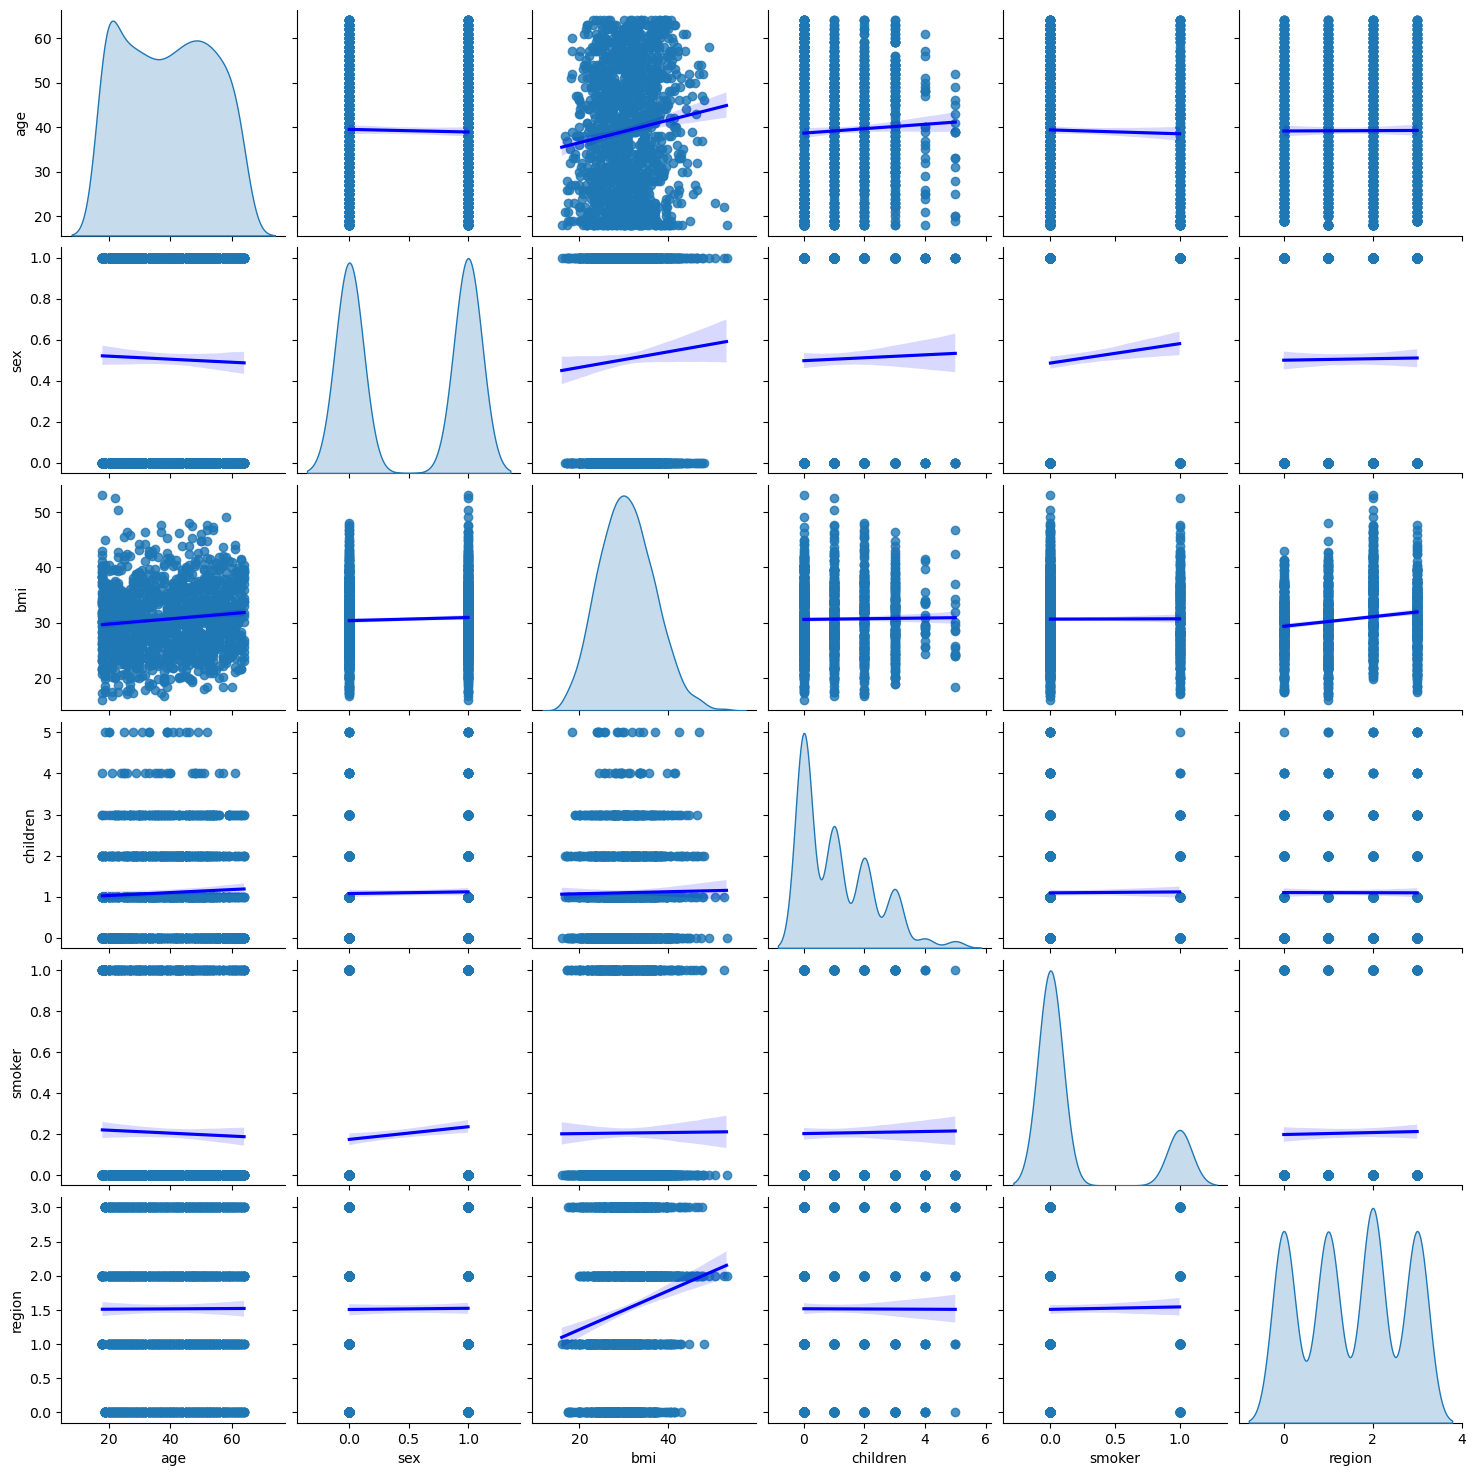

In [125]:
import seaborn as sns 
sns.pairplot(data[train_cols],kind='reg', diag_kind='kde',
plot_kws={'line_kws':{'color':'blue'}})
plt.show()

### Correlation Analysis:

From the heatmap:

* The attribute age has a moderate positive correlation (0.3) with expenses. This means that as age increases, medical expenses tend to increase.
* The attribute bmi also has a moderate positive correlation (0.2) with expenses. Higher BMI values might lead to higher medical expenses.
* The number of children has a very weak positive correlation with expenses.

### Scatter Plot Observations:

* Age vs Expenses: There's a clear trend indicating that older individuals tend to have higher expenses. Additionally, smokers, irrespective of their age, generally have higher medical expenses than non-smokers.
* BMI vs Expenses: There are two distinct clusters based on the smoking attribute. For smokers, as BMI increases, the medical expenses also increase. For non-smokers, the expenses are generally lower, but there's still a mild upward trend with increasing BMI.
* Children vs Expenses: The number of children doesn't show a very strong trend with expenses. However, smokers consistently have higher expenses than non-smokers across all child counts.
* These observations confirm the importance of the smoker attribute in predicting medical expenses. The difference in expenses between smokers and non-smokers is evident across all other attributes.

# D. Selecting 20% of the Data for Testing

### Train Test Split

In [10]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets (80% train, 20% test)
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)
# Compare key statistics to ensure the test data is representative
train_stats = train_data.describe(include='all')
test_stats = test_data.describe(include='all')

train_stats, test_stats

(               age          sex          bmi     children       smoker  \
 count  1070.000000  1070.000000  1070.000000  1070.000000  1070.000000   
 mean     39.357009     0.512150    30.562150     1.107477     0.205607   
 std      14.073960     0.500086     6.043266     1.215983     0.404334   
 min      18.000000     0.000000    16.000000     0.000000     0.000000   
 25%      27.000000     0.000000    26.200000     0.000000     0.000000   
 50%      39.500000     1.000000    30.200000     1.000000     0.000000   
 75%      51.000000     1.000000    34.500000     2.000000     0.000000   
 max      64.000000     1.000000    53.100000     5.000000     1.000000   
 
             region      expenses  
 count  1070.000000   1070.000000  
 mean      1.518692  13346.089869  
 std       1.105783  12019.510759  
 min       0.000000   1121.870000  
 25%       1.000000   4897.665000  
 50%       2.000000   9575.440000  
 75%       2.000000  16746.655000  
 max       3.000000  62592.870000  

In [126]:
train_data.describe()

,age,sex,bmi,children,smoker,region,expenses
count,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000
mean,39.357009,0.512150,30.562150,1.107477,0.205607,1.518692,13346.089869
std,14.073960,0.500086,6.043266,1.215983,0.404334,1.105783,12019.510759
min,18.000000,0.000000,16.000000,0.000000,0.000000,0.000000,1121.870000
25%,27.000000,0.000000,26.200000,0.000000,0.000000,1.000000,4897.665000
50%,39.500000,1.000000,30.200000,1.000000,0.000000,2.000000,9575.440000
75%,51.000000,1.000000,34.500000,2.000000,0.000000,2.000000,16746.655000
max,64.000000,1.000000,53.100000,5.000000,1.000000,3.000000,62592.870000


In [127]:
test_data.describe()

,age,sex,bmi,children,smoker,region,expenses
count,268.000000,268.000000,268.000000,268.000000,268.000000,268.00000,268.000000
mean,38.608209,0.477612,31.077985,1.044776,0.201493,1.50000,12968.317276
std,13.963819,0.500433,6.308350,1.163526,0.401866,1.10667,12483.196292
min,18.000000,0.000000,16.800000,0.000000,0.000000,0.00000,1131.510000
25%,26.000000,0.000000,26.675000,0.000000,0.000000,0.00000,4288.745000
50%,38.000000,0.000000,30.800000,1.000000,0.000000,2.00000,8487.880000
75%,50.000000,1.000000,35.200000,2.000000,0.000000,2.00000,16367.832500
max,64.000000,1.000000,52.600000,5.000000,1.000000,3.00000,63770.430000


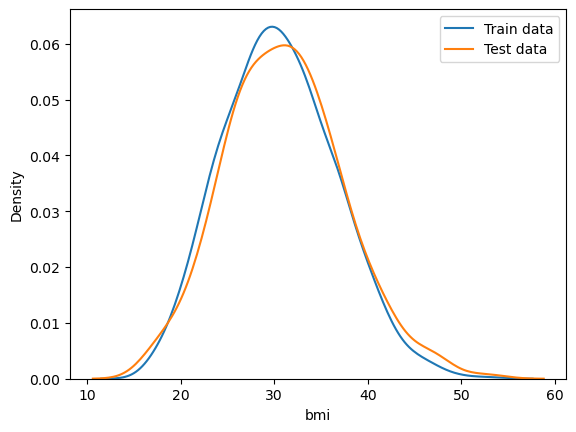

In [132]:
ax = sns.kdeplot(train_data['bmi'],label='Train data') 
sns.kdeplot(test_data['bmi'], ax=ax,label='Test data') 
plt.legend()

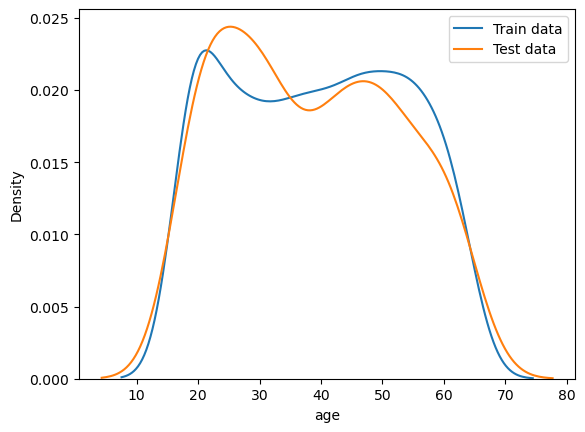

In [134]:
ax = sns.kdeplot(train_data['age'],label='Train data') 
sns.kdeplot(test_data['age'], ax=ax,label='Test data') 
plt.legend()

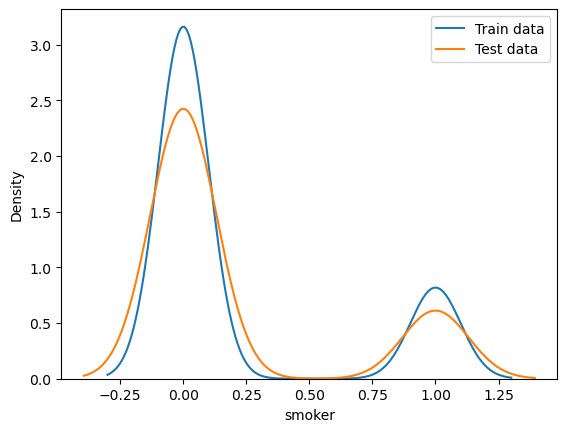

In [135]:
ax = sns.kdeplot(train_data['smoker'],label='Train data') 
sns.kdeplot(test_data['smoker'], ax=ax,label='Test data') 
plt.legend()

### Comparing the key statistics between the training and testing datasets:

* age: Both training and testing datasets have similar distributions for age.
* sex: Both datasets have nearly equal distributions of males and females.
* bmi: The distributions of BMI are consistent across both datasets.
* children: The average number of children is similar in both sets.
* smoker: The proportion of smokers in both datasets is approximately consistent.
* region: The distribution of regions is consistent between the training and testing datasets.
* expenses: The mean, median, and other key statistics of medical expenses are similar between the training and testing datasets.

Given the above comparisons, the testing dataset appears to be representative of the entire dataset

# E. Training a Linear Regression Model

In [208]:
from sklearn.preprocessing import StandardScaler #, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, SGDRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
import numpy as np

# Separate features and target variable
X_train = train_data.drop("expenses", axis=1)
y_train = train_data["expenses"]


# Define a column transformer for preprocessing
numeric_features = ["age", "bmi", "children"]
categorical_features = ["sex", "smoker", "region"]

preprocessor = ColumnTransformer(
    transformers=[
           ("num", StandardScaler(), numeric_features)
#         ,("cat", OneHotEncoder(), categorical_features)
    ])

# Closed-form solution (using Ridge, Lasso, and ElasticNet regularization)
models = {
    "Linear Regression": LinearRegression(),
    "Ridge": Ridge(alpha=1.0),
    "Lasso": Lasso(alpha=1.0),
    "ElasticNet": ElasticNet(alpha=1.0, l1_ratio=0.5)
}

lin_reg =  model.fit(X_train,y_train.values.ravel())
results = {}
for name, model in models.items():
    pipeline = Pipeline([
        ("preprocessor", preprocessor),
        ("model", model)
    ])
    
    # Perform 4-fold cross-validation and compute RMSE
    scores = cross_val_score(pipeline, X_train, y_train, scoring="neg_mean_squared_error", cv=4)
    rmse_scores = [np.sqrt(-score) for score in scores]
    results[name] = np.mean(rmse_scores)

results


{'Linear Regression': 11364.794632351088,
 'Ridge': 11364.722655197977,
 'Lasso': 11364.785095947898,
 'ElasticNet': 11411.629570701294}

### Observations:

* Linear Regression, Ridge, and Lasso perform similarly in terms of RMSE, with only slight variations.
* ElasticNet (which combines L1 and L2 regularization) has a higher RMSE, suggesting it might not be the best choice with the given alpha and l1_ratio values.

### SGDRegressor with Regularization

In [198]:
from sklearn.model_selection import train_test_split

# Split the training data further into training and validation sets
X_train_partial, X_val, y_train_partial, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Preprocess the training and validation data
X_train_preprocessed = preprocessor.fit_transform(X_train_partial)
X_val_preprocessed = preprocessor.transform(X_val)

# SGDRegressor
sgd_models = {
    "SGD - Ridge (L2) - 0.01": SGDRegressor(max_iter=1000, tol=1e-3, penalty="l2", alpha=0.01, learning_rate="invscaling", eta0=0.1),
    "SGD - Ridge (L2) - 0.1": SGDRegressor(max_iter=1000, tol=1e-3, penalty="l2", alpha=0.1, learning_rate="invscaling", eta0=0.01),
    "SGD - Ridge (L2) - 1": SGDRegressor(max_iter=1000, tol=1e-3, penalty="l2", alpha=1, learning_rate="invscaling", eta0=0.01),
    "SGD - Lasso (L1) - 0.01": SGDRegressor(max_iter=1000, tol=1e-3, penalty="l1", alpha=0.01, learning_rate="invscaling", eta0=0.01),
    "SGD - Lasso (L1) - 0.1": SGDRegressor(max_iter=1000, tol=1e-3, penalty="l1", alpha=0.1, learning_rate="invscaling", eta0=0.01),
    "SGD - Lasso (L1) - 1": SGDRegressor(max_iter=1000, tol=1e-3, penalty="l1", alpha=1, learning_rate="invscaling", eta0=0.01),
    "SGD - ElasticNet - 0.01 - 0.25": SGDRegressor(max_iter=1000, tol=1e-3, penalty="elasticnet", alpha=0.01, l1_ratio=0.25),
    "SGD - ElasticNet - 0.1 - 0.5": SGDRegressor(max_iter=1000, tol=1e-3, penalty="elasticnet", alpha=0.01, l1_ratio=0.5),
    "SGD - ElasticNet - 10 - 0.75": SGDRegressor(max_iter=1000, tol=1e-3, penalty="elasticnet", alpha=0.01, l1_ratio=0.25)
}
train_errors, val_errors = [], []
sgd_results = {}
for name, model in sgd_models.items():
    model.fit(X_train_preprocessed, y_train_partial)
    y_val_pred = sgd_reg.predict(X_val_preprocessed)
    rmse = np.sqrt(mean_squared_error(y_val, y_val_pred))
    sgd_results[name] = rmse

sgd_results

{'SGD - Ridge (L2) - 0.01': 11728.532625306163,
 'SGD - Ridge (L2) - 0.1': 11728.532625306163,
 'SGD - Ridge (L2) - 1': 11728.532625306163,
 'SGD - Lasso (L1) - 0.01': 11728.532625306163,
 'SGD - Lasso (L1) - 0.1': 11728.532625306163,
 'SGD - Lasso (L1) - 1': 11728.532625306163,
 'SGD - ElasticNet - 0.01 - 0.25': 11728.532625306163,
 'SGD - ElasticNet - 0.1 - 0.5': 11728.532625306163,
 'SGD - ElasticNet - 10 - 0.75': 11728.532625306163}

In [224]:
 # Perform 4-fold cross-validation and compute RMSE on SGDRegressor
scores = cross_val_score(pipeline, X_train_partial, y_train_partial, scoring="neg_mean_squared_error", cv=4)
rmse_scores_sgd = [np.sqrt(-score) for score in scores]
results[name] = np.mean(rmse_scores_sgd)
rmse_scores_sgd

[11538.910654547339,
 11053.941843018105,
 11411.720522956206,
 11282.217165381559]

In [199]:
from sklearn.linear_model import SGDRegressor
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=Warning)

def train_sgd_with_regularization(alpha, l1_ratio, max_iter=10000, eta0=0.0001, batch_size=20):
    """
    Train an SGDRegressor with given regularization parameters and return training and validation losses.
    """
    sgd_reg = SGDRegressor(penalty='elasticnet', alpha=alpha, l1_ratio=l1_ratio, 
                           learning_rate='constant', eta0=eta0, max_iter=10000, warm_start=True,
                           random_state=42)
    
    train_errors, val_errors = [], []
    for _ in range(max_iter):
        sgd_reg.fit(X_train_poly, y_train)
        y_train_predict = sgd_reg.predict(X_train_poly)
        y_val_predict = sgd_reg.predict(X_val_poly)
        train_errors.append(mean_squared_error(y_train, y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))
    
    return train_errors, val_errors

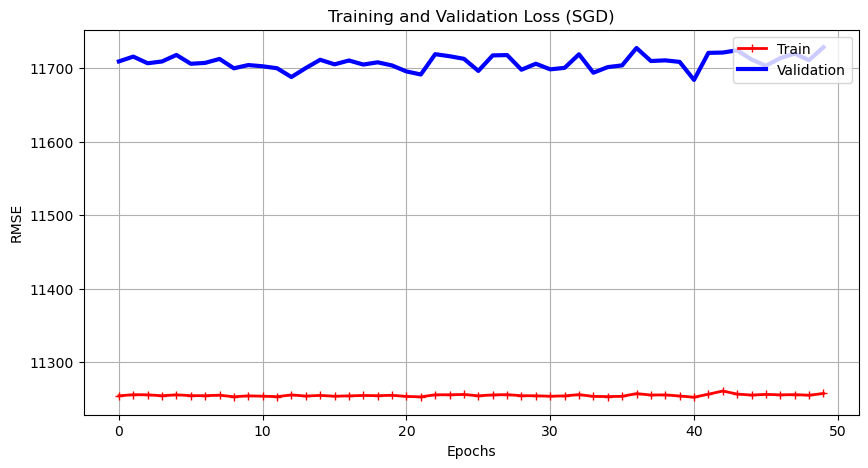

In [68]:
# Train the model and capture training and validation errors for each epoch
for epoch in range(50):
    sgd_reg.fit(X_train_preprocessed, y_train_partial)
    y_train_predict = sgd_reg.predict(X_train_preprocessed)
    y_val_predict = sgd_reg.predict(X_val_preprocessed)
    train_errors.append(mean_squared_error(y_train_partial, y_train_predict))
    val_errors.append(mean_squared_error(y_val, y_val_predict))

# Plot training and validation loss as a function of iteration
plt.figure(figsize=(10, 5))
plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="Train")
plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="Validation")
plt.xlabel("Epochs")
plt.ylabel("RMSE")
plt.legend(loc="upper right")
plt.title("Training and Validation Loss (SGD)")
plt.grid(True)
plt.show()

# F. Polynomial Regression

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
# Create polynomial features
degree = 3
poly_features = PolynomialFeatures(degree=degree, include_bias=False)
X_train_poly = poly_features.fit_transform(X_train_preprocessed)
X_val_poly = poly_features.transform(X_val_preprocessed)

X_train_poly.shape, X_val_poly.shape
# Train the model

model.fit(X_train, y_train)

# Predict and evaluate on the training and test set
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)
rmse_train = mean_squared_error(y_train, y_pred_train, squared=False)
rmse_test = mean_squared_error(y_test, y_pred_test, squared=False)

# Perform 4-fold cross validation
cv_scores = cross_val_score(pipeline, X_train, y_train, cv=4, scoring='neg_mean_squared_error')
rmse_scores = [(-mse)**0.5 for mse in cv_scores]

print("Training RMSE:", rmse_train)
print("Testing RMSE:", rmse_test)
print("4-fold Cross Validation RMSE Scores:", rmse_scores)
print("Average RMSE from Cross Validation:", sum(rmse_scores) / 4)

#### SGDRegressor with Regularization

In [231]:
from sklearn.linear_model import SGDRegressor
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=Warning)

def train_sgd_with_regularization(penalty,alpha, l1_ratio, max_iter=30000, eta0=0.001, batch_size=20):
    """
    Train an SGDRegressor with given regularization parameters and return training and validation losses.
    """
    sgd_reg = SGDRegressor(penalty=penalty, alpha=alpha, l1_ratio=l1_ratio, 
                           learning_rate='constant', eta0=eta0, max_iter=10000, warm_start=True,
                           random_state=42)
    
    train_errors, val_errors = [], []
    for _ in range(max_iter):
        sgd_reg.fit(X_train_poly, y_train_partial)
        y_train_predict = sgd_reg.predict(X_train_poly)
        y_val_predict = sgd_reg.predict(X_val_poly)
        train_errors.append(mean_squared_error(y_train_partial, y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))
    
    return y_val_predict,train_errors, val_errors

# G. Implementing Regularization and also predicting the labels on test data simultaneously

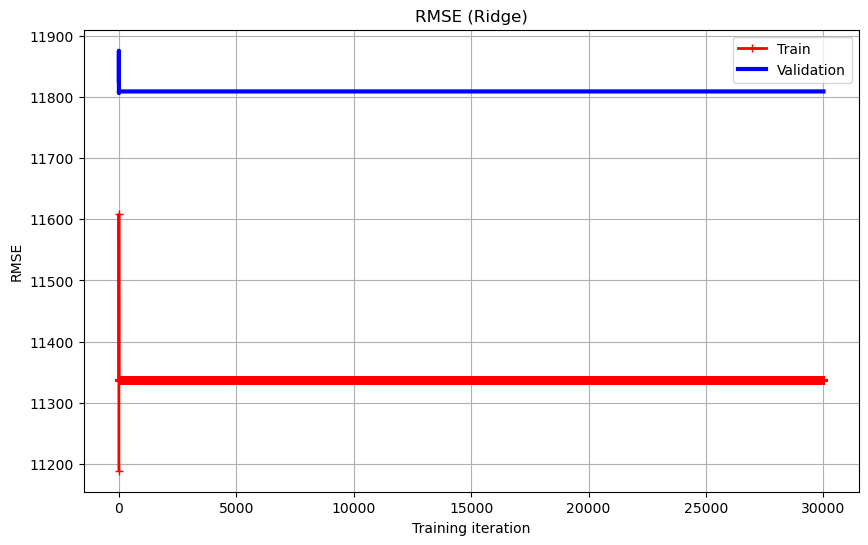

(11336.97413130368, 11809.470695384867)

In [237]:
# Train with Ridge regularization (l1_ratio=0)
ridge_prediction, ridge_train_errors, ridge_val_errors = train_sgd_with_regularization(penalty='l2',alpha=0.1, l1_ratio=0, batch_size=40)

# Ridge regularization RMSE
ridge_final_train_rmse, ridge_final_val_rmse = plot_rmse(ridge_train_errors, ridge_val_errors, "RMSE (Ridge)")

ridge_final_train_rmse, ridge_final_val_rmse

In [238]:
reg_prediction[:5]

array([14221.6610325 , 16494.66189691, 16629.26668148, 18952.79671383,
        8099.46886361])

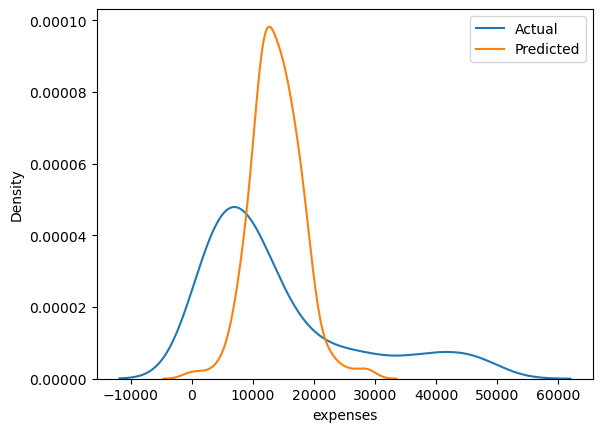

In [254]:
sns.distplot(y_val,hist = False,label ='Actual')
sns.distplot(ridge_prediction,hist = False, label='Predicted')
plt.legend()

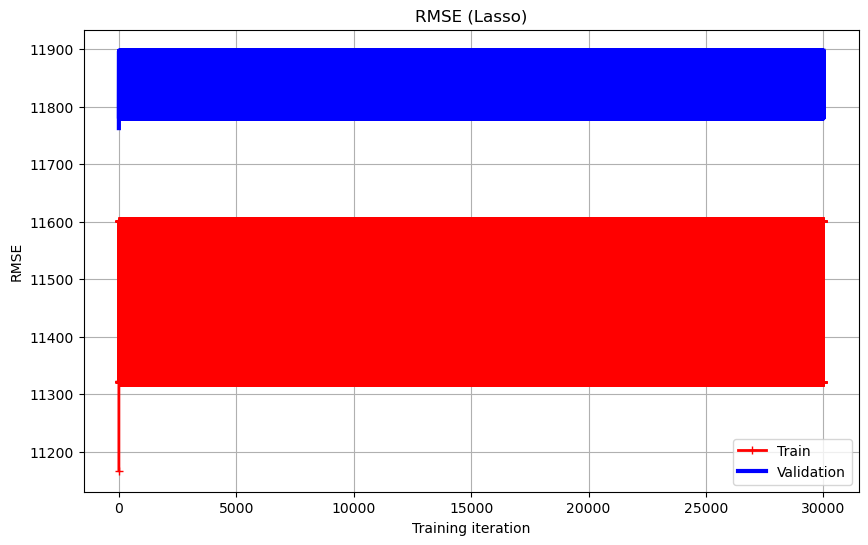

(11601.669870987089, 11897.119728833939)

In [240]:
# Lasso regularization RMSE
lasso_prediction, lasso_train_errors, lasso_val_errors  = train_sgd_with_regularization(penalty='l1',alpha=0.01, l1_ratio=0, batch_size=50)

lasso_final_train_rmse, lasso_final_val_rmse = plot_rmse(lasso_train_errors, lasso_val_errors, "RMSE (Lasso)")

lasso_final_train_rmse, lasso_final_val_rmse

In [241]:
lasso_prediction[:5]

array([14537.34222089, 18478.33075174, 18210.69751802, 19652.96052227,
        5642.77312495])

In [252]:
# sns.distplot(y_val,hist = False,label ='Actual')
# sns.distplot(lasso_prediction,hist = False, label='Predicted')
# plt.legend()

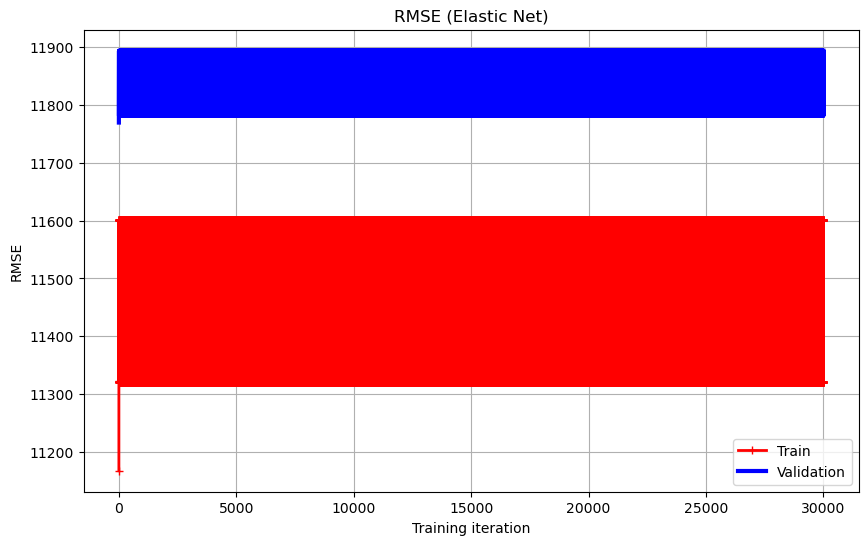

(11600.483478243537, 11893.254029020993)

In [243]:
# Elastic Net regularization RMSE
elastic_prediction, elastic_net_train_errors, elastic_net_val_errors = train_sgd_with_regularization(penalty='elasticnet',alpha=0.01, l1_ratio=0, batch_size=50)

elastic_net_final_train_rmse, elastic_net_final_val_rmse = plot_rmse(elastic_net_train_errors, elastic_net_val_errors, "RMSE (Elastic Net)")

elastic_net_final_train_rmse, elastic_net_final_val_rmse

In [244]:
elastic_prediction[:5]

array([14469.90106929, 18391.75084271, 18018.22162108, 19687.69651617,
        5716.87008159])

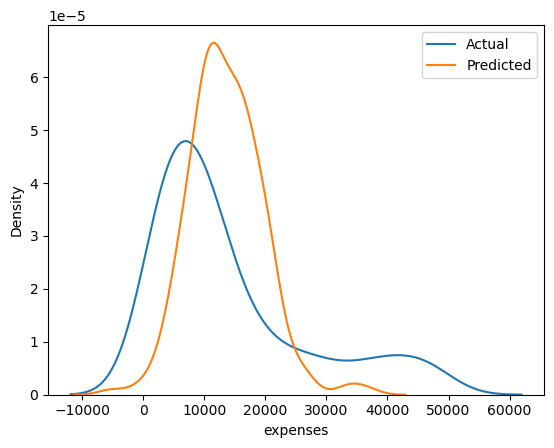

In [255]:
import seaborn as sns
sns.distplot(y_val,hist = False,label ='Actual')
sns.distplot(elastic_prediction,hist = False, label='Predicted')
plt.legend()

### Summary of performance using the appropriate evaluation metric - RMSE

* From the learning curves we can see that Polynomial regression is over fitting the data
* Increasing the batch size helps the model to converge fast to mininum RMSE error

### Further Improvements
* We can do a hyperparameter sweep for more variables with grid search technique to find the right set of hyperparameters
* A better encoding of the country names instead of one-hot encoding as it increases the feature space substantially. * So a heuristic-based encoding of country names can improve the performance
* We can go for Deep Neural Networks as they can improve with the dimensionality of the data for the regression task